In [1]:
#importing the required libraries
!pip install emnist
from emnist import list_datasets
from emnist import extract_training_samples
from emnist import extract_test_samples
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D,MaxPooling1D
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow


Using TensorFlow backend.


In [0]:
#Creating a dictionary to map letters to numbers based on the EMNIST dataset
letters={1:'a',2:'b',3:'c',4:'d',5:'e',6:'f',7:'g',8:'h',9:'i',10:'j',11:'k',12:'l',13:'m',14:'n',15:'o',16:'p',17:'q',18:'r',19:'s',20:'t',21:'u',22:'v',23:'w',24:'x',25:'y',26:'z'}

In [2]:
#Load the test and train samples and see the kind of data we have
train_images,train_labels=extract_training_samples('letters')
test_images,test_labels=extract_test_samples('letters')
print('Number of Training Images: '+str(train_images.shape[0]))
print('Number of Test images: '+str(test_images.shape[0]))
print('Shape of Image: '+str(train_images.shape[1:3]))

Number of Training Images: 124800
Number of Test images: 20800
Shape of Image: (28, 28)


In [4]:
#Reshape the images to fit our keras model
test_images = test_images.reshape(test_images.shape[0], 1, 28, 28)
train_images = train_images.reshape(train_images.shape[0], 1, 28, 28)
input_shape = (1, 28, 28)
#more reshaping to normalize the image
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255
print('train_images shape:', train_images.shape)
print('test_images shape:', test_images.shape)

train_images shape: (124800, 1, 28, 28)


In [5]:
#Formating the labels to a one-hot encoding format with 26 classes
print('Shape of labels before formatting:'+str(train_labels.shape))
train_labels=train_labels-1
test_labels=test_labels-1
train_labels = to_categorical(train_labels,num_classes=26)
test_labels=to_categorical(test_labels,num_classes=26)
print('Shape of labels after formatting:'+str(train_labels.shape)

(124800,)
(124800, 26)


In [7]:
#Defining the model
model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu',kernel_initializer='he_normal',input_shape=input_shape,data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))
#model.add(Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu',kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=26,activation='softmax'))

W0728 16:46:48.212764 140710391883648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0728 16:46:48.256663 140710391883648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 16:46:48.274863 140710391883648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0728 16:46:48.296724 140710391883648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0728 16:46:48.298025

In [8]:
#Compiling our model by defining the loss function,optimizer and metrics
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0728 16:46:52.289806 140710391883648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [9]:
#Training our model and storing the logs in history
history=model.fit(train_images,train_labels,epochs=30,batch_size=32)

W0728 16:46:58.865260 140710391883648 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
124800/124800 [==============================] - 54s 430us/step - loss: 0.5791 - acc: 0.8233
Epoch 2/30
124800/124800 [==============================] - 53s 422us/step - loss: 0.3072 - acc: 0.8999
Epoch 3/30
124800/124800 [==============================] - 53s 422us/step - loss: 0.2480 - acc: 0.9176
Epoch 4/30
124800/124800 [==============================] - 54s 429us/step - loss: 0.2117 - acc: 0.9274
Epoch 5/30
124800/124800 [==============================] - 54s 430us/step - loss: 0.1858 - acc: 0.9348
Epoch 6/30
124800/124800 [==============================] - 53s 427us/step - loss: 0.1652 - acc: 0.9411
Epoch 7/30
124800/124800 [==============================] - 54s 429us/step - loss: 0.1486 - acc: 0.9454
Epoch 8/30
124800/124800 [==============================] - 54s 434us/step - loss: 0.1341 - acc: 0.9499
Epoch 9/30
124800/124800 [==============================] - 53s 426us/step - loss: 0.1226 - acc: 0.9543
Epoch 10/30
124800/124800 [==============================] - 53s

In [10]:
#Evaluating the model by testing the images and getting validation loss and accuracy
loss_and_metrics = model.evaluate(test_images,test_labels, batch_size=128)

20800/20800 [==============================] - 3s 129us/step


In [11]:
#Validation Loss and Accuracy
print("Validation Accuracy: ",loss_and_metrics[1])
print("Validation Loss: ",loss_and_metrics[0])

Validation Accuracy:  0.90375
Validation Loss:  0.5854572358154334


dict_keys(['loss', 'acc'])


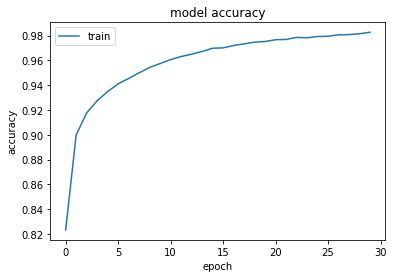

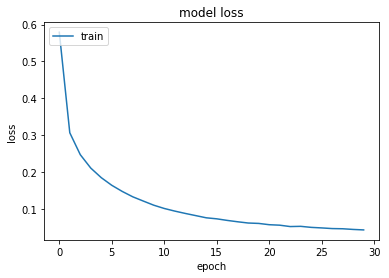

In [12]:
#Code for seeing how our model has trained

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
#Predicting on test images and getting the labels
classes = model.predict(test_images)

't'

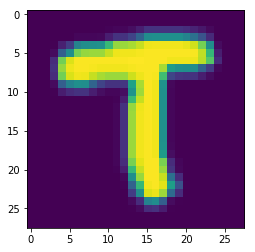

In [150]:
#Testing on a random image from the test samples
plt.imshow(test_images[15456].reshape(28,28))
letters[np.argmax(classes[15456])+1]

Predicted Letter: c


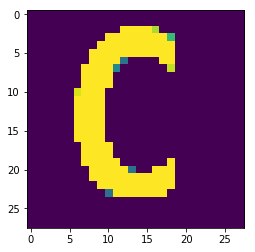

In [162]:
#Code for testing on your own handwritten letter image
img = cv2.imread('C.png')
#cv2_imshow(img)
img = cv2.resize(img,(28,28))
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray=img_gray/255.0
img_gray=1-img_gray
plt.imshow(img_gray)
y=model.predict(img_gray.reshape(1,1,28,28))
print('Predicted Letter: '+letters[np.argmax(y)+1])